# Географические данные в Python: I — простые векторные объекты: 

Здесь мы узнаем, как работать с векторными объектами в Python с помощью библиотеки [shapely](https://shapely.readthedocs.io/en/stable/manual.html). Также мы будем использовать связанную библиотеку `geopandas`, которая позволяет манипулировать географическими данными в целом. Понимание того, как векторные объекты (`Geometry`) работают и могут быть созданы в Python, необходимо для решения дальнейших задач, поскольку являются базовами "строительными блоками", из которых строится эффективный анализ географических данных.

## `shapely` 

`Shapely` — это фундаментальный пакет Python для представления геометрии векторных данных на компьютере. Базовые знания библтотеки shapely важны для использования зависящих от него инструментов более высокого уровня, таких как `geopandas`.

Объекты и методы, доступные в `shapely`, в целом соответсвуют спецификации [the Open Geospatial Consortium’s Simple Features Access Specification](https://www.ogc.org/standards/sfa) [1], что делает их совместимыми с различными ГИС.

Полный список shapely объектов и методов см. в [интерактивном руководстве пользователя shapely](https://shapely.readthedocs.io/en/stable/manual.html)

### Создание точек

Для создания точечного объекта с помощью shapely импортируем подкласс геометрических объектов (`Point`), из класса shapely.geometry, содержащего все доступные типы геометрии. Затем мы просто указываем горизонтальные координаты `x` и `y` в подклассе Point() (с возможной вертикальной z-координатой), который создаст для нас точки в двухмерном (`point`) и трехмерном (`point3D`) пространстве:

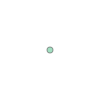

In [21]:
from shapely.geometry import Point

point = Point(2.2, 5.2)
point3D = Point(3.3, -4.5, 6)

point

_**Рис. 1**. ВИЗУАЛИЗИРОВАННАЯ ТОЧКА._

Обратите внимание, что Jupyter Notebook автоматически визуализирует форму точки на экране.

Выведем на экран текстовое представление о геометрии точки (при выводе буква Z обозначает трехмерные координаты).

In [2]:
print(point)
print(point3D)

POINT (2.2 5.2)
POINT Z (3.3 -4.5 6)


Для извлечения координат из объекта Point в виде числовых значений используются следующие свойства:
- `coords` (чтобы получить доступ к содержимому мы преобразовали результат в список);
- можем получить доступ к координатам напрямую, используя свойства `x` и `y`;

In [3]:
# use property coords
print(list(point.coords))

# use properties x and y
print(point.x)
print(point.y)

[(2.2, 5.2)]
2.2
5.2


Аналогично для точки в трехмерном пространстве:

In [22]:
# use property coords
print(list(point3D.coords))

# use properties x and y
print(point3D.x)
print(point3D.y)
print(point3D.z)

[(3.3, -4.5, 6.0)]
3.3
-4.5
6.0


### Создание линий

Создание линий (`LineString`-объектов) очень похоже на создание точек. Нам нужно как минимум две точки для создания линии. Мы можем построить линию двумя способами:
- использовать список объектов Point;
- передать координаты точек в виде кортежей координат конструктору `LineString`

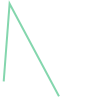

In [5]:
from shapely.geometry import Point, LineString

p1 = Point(22, 13.4)
p2 = Point(11, 2.3)
p3 = Point(3.4, 5.5)

l1 = LineString([p1, p2, p3])
l2 = LineString([(2.3, 6.3), (4.4, 34), (22, 1)])

l2

_**Рис. 2**. Визуализация линии._

 Получаем текстовое представление о геометрии точки - переменные `l1` и `l2` состоят из нескольких пар координат.

In [6]:
print(l1)
print(l2)

LINESTRING (22 13.4, 11 2.3, 3.4 5.5)
LINESTRING (2.3 6.3, 4.4 34, 22 1)


`LineString-объекты` имеют много полезных встроенных атрибутов и методов. Например, можно извлечь координаты, рассчитать длину линии, найти центр тяжести, создать точки вдоль линии на определенном расстоянии, вычислить ближайшее расстояние от линии до указанной точки или упростить геометрию. Полный список функций можно прочитать в [документации](https://shapely.readthedocs.io/en/stable/properties.html) [3]. Здесь мы рассмотрим лишь некоторые:

In [7]:
# extract the coordinates of a LineString
coords = list(l1.coords)
# print x-y coordinates for all points
print(coords)

# print x-y coordinates for a first point
print(coords[0])

# print x-y coordinates for a last point
print(coords[-1])

[(22.0, 13.4), (11.0, 2.3), (3.4, 5.5)]
(22.0, 13.4)
(3.4, 5.5)


Если вам нужно получить доступ ко всем x-координатам или ко всем y-координатам линии, вы можете сделать это напрямую с помощью `xy` атрибута:

In [8]:
xcoords = list(l1.xy[0])
ycoords = list(l1.xy[1])

print(xcoords)
print(ycoords)

[22.0, 11.0, 3.4]
[13.4, 2.3, 5.5]


Можно получить и другие атрибуты - такие как длина (`length`)  и геометрический центр линии (`centroid`), прямо из самого объекта:

In [9]:
length = l2.length
centroid = l2.centroid
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 65.18 units
Centroid: POINT (9.001931406302425 18.62942962165468)


Обратите внимание, что геометрический центр линии также  является точкой, т.е. `Point`-объектом библиотеки Shapely

### Создание полигона

Аналогично предыдущим примерам с точкой и линией создадим полигон (`Polygon`-объект). Полигон можно создать, передав список Point-объектов или список кортежей координат в качестве входных данных для  подкласса `Polygon`. Для этого требуется как минимум три кортежа координат. Возьмем  точки из примера выше.

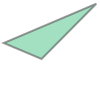

In [10]:
from shapely.geometry import Polygon

poly = Polygon([p1, p2, p3])
poly

_**Рис. 3**. Визуализация полигона._

In [11]:
print(poly)

POLYGON ((22 13.4, 11 2.3, 3.4 5.5, 22 13.4))


Обратите внимание, что представление геометрического объекта `Polygon` имеет двойные круглые скобки. Это связано с тем, что  форма полигона может быть сложной и содержать не только внешние границы, но и  внутренние. Вы можете получить дополнительную информацию об объекте (не только об этом) запустив следующий код: Polygon?

Если мы хотим создать полигон с внутренней границей, мы можем сделать это, используя параметры shell - для указания внешней границы - и holes - для внутренней. Создадим сложный полигон с указанием координат внешней границы (`exter`) и внутренней (`inter`). Второй список содержит вложенные квадратные скобки, поскольку Polygon-объект может содержать несколько внутренних границ, образующих своего рода "вырезы" внутри полигона:

In [12]:
# Define the exterior
exter = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the hole
inter = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

Сначала создадим простой полигон, содержащий только внешние границы:

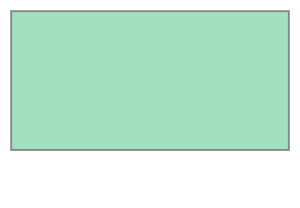

In [13]:
poly_ext = Polygon(shell=exter)
poly_ext

_**Рис 4**. Визуализация простого полигона._

Теперь создадим полигон с внутренней границей:

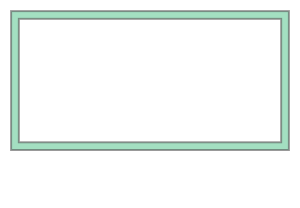

In [14]:
poly_int = Polygon(shell=exter, holes=inter)
poly_int

_**Рис 5**. Визуализация полигона с внешними и внутренними границами._

Выведим на экран текстовое представление полигона:

In [15]:
print(poly_int)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


У объекта Polygon также есть много полезных атрибутов и методов, например  `area`или `centroid`. Полный список можно найти в документации. Вот несколько атрибутов полигонов, которые часто бывают полезны при анализе географических данных:

In [16]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (12.133333333333333 7.0666666666666655)
Polygon Area:  59.780000000000015
Polygon Bounding Box:  (3.4, 2.3, 22.0, 13.4)
Polygon Exterior:  LINEARRING (22 13.4, 11 2.3, 3.4 5.5, 22 13.4)
Polygon Exterior Length:  44.0815977595283


С помощью конструктора библиотеки shapely `box` можно создать минимальную ограничивающую рамку с заданными координатами. Для этого используется информация о координатах нижнего левого и верхнего правого углов прямоугольника:

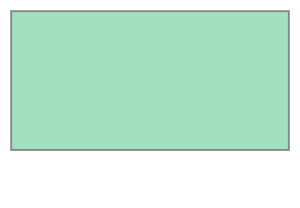

In [17]:
from shapely.geometry import box

min_x, min_y = -180, -90
max_x, max_y = 180, 90
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

_**Рис 6**. Визуализация рамки._

In [18]:
print(box_poly)

POLYGON ((180 -90, 180 90, -180 90, -180 -90, 180 -90))


На практике  функция `box` полезна, например, когда вы хотите выбрать все векторные объекты из определенной интересующей области.

### Создание множественных геометрических объектов MultiPoint, MultiLineString и MultiPolygon

Для создания множественных геометрических объектов мы просто передаем список объектов `Point`, `LineString` или `Polygon` конструкторам `MultiPoint`, `MultiLineString` и `MultiPolygon` как указано ниже:

In [19]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
print(multipoint)

multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
print(multiline)

multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
print(multipoly)

MULTIPOINT (2 2, 3 3)
MULTILINESTRING ((2 2, 3 3), (4 3, 6 4))
MULTIPOLYGON (((0 0, 0 4, 4 4, 0 0)), ((6 6, 6 12, 12 12, 6 6)))


### Задание 2.1

Создайте эти фигуры с помощью библиотеки `Shapely`!

- **Египетский треугольник**   
- **Квадрат**    
- **Круг** (используйте функцию `buffer` Point-объекта)

### Список использованных источников

1. https://www.ogc.org/standards/sfa
2. https://shapely.readthedocs.io/en/stable/manual.html
3. https://shapely.readthedocs.io/en/stable/properties.html
